In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
Data_set=pd.read_csv("/Users/adamheshmatmakram/Documents/GitHub/Loan-prediction/Project/Train data.csv")
print(Data_set)
if 'Credit_History' in Data_set.columns:
    Data_set['Credit_History'] = Data_set['Credit_History'].astype('object')

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

### Checking for Skewness and Choosing Outlier Detection Method

Before detecting outliers, it's important to understand the distribution of the numerical features. If the data is skewed, methods like the Z-score, which assume a normal distribution, might not be the best approach. The Interquartile Range (IQR) method, on the other hand, is less sensitive to the distribution and is generally more robust for skewed data.

Let's visualize the distributions of the numerical features to check for skewness.

Plotting distributions for numeric columns to check for skewness:


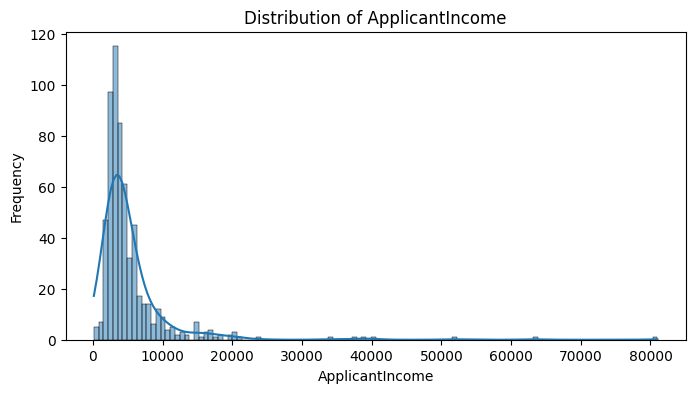

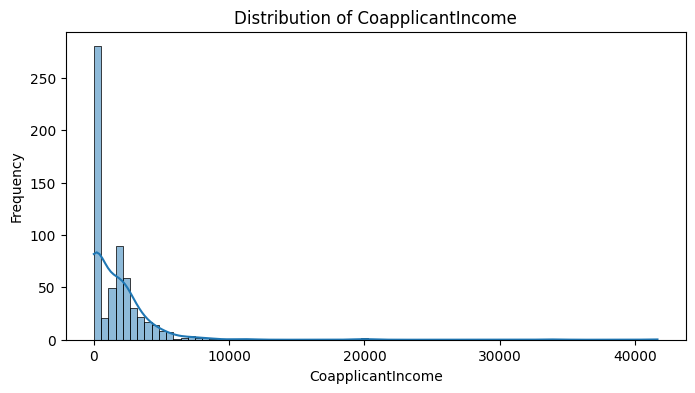

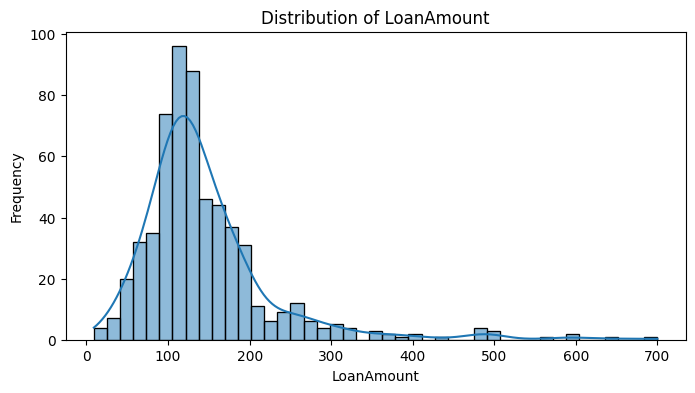

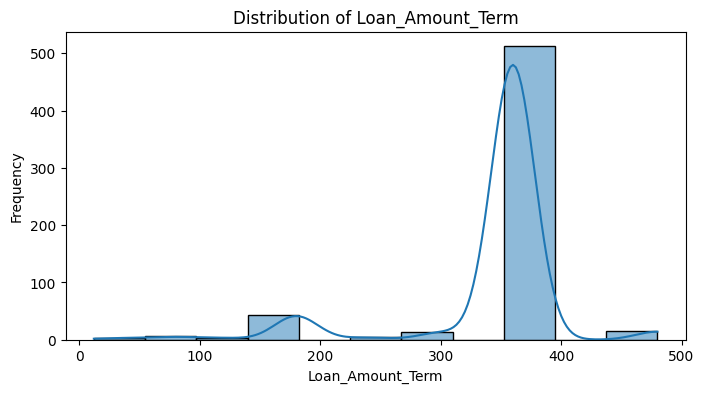

In [17]:
# Select only numeric columns for plotting
numeric_cols_for_plot = Data_set.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable if it's numeric after encoding
if 'Loan_Status' in numeric_cols_for_plot:
    numeric_cols_for_plot.remove('Loan_Status')

print("Plotting distributions for numeric columns to check for skewness:")

for col in numeric_cols_for_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(Data_set[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

As you can see from the plots above, many of the numerical features are skewed (e.g., ApplicantIncome, CoapplicantIncome, LoanAmount). This skewness supports the use of the IQR method for outlier detection, as it does not assume a normal distribution like the Z-score method does.

In [18]:
number_cols = Data_set.select_dtypes(exclude=['object']).columns.tolist()
#print(number_cols)
df=Data_set[number_cols]
#print(df)
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(df)
df=imp_mean.transform(df)
df = pd.DataFrame(df, columns=number_cols)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
print(df.head())
#df.to_csv("cleaned_numeric_data.csv", index=False)




   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0          5849.00               0.00      146.41            360.00
1          4583.00            1508.00      128.00            360.00
2          3000.00               0.00       66.00            360.00
3          2583.00            2358.00      120.00            360.00
4          6000.00               0.00      141.00            360.00


In [19]:
category_cols = Data_set.select_dtypes(include=['object']).columns.tolist()
dc=Data_set[category_cols]
#print(dc)
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mode.fit(dc)
dc=imp_mode.transform(dc)

print(dc)

[['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001005' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ...
 ['LP002983' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ['LP002984' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ['LP002990' 'Female' 'No' ... 0.0 'Semiurban' 'N']]


In [20]:
Data_set[number_cols]=df
Data_set[category_cols]=dc
print(Data_set)
#Data_set.to_csv("Cleaned.csv",index=False, encoding='utf-8', float_format='%.2f')

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            5849.00               0.00      146.41           

In [21]:


normalizer=MinMaxScaler(feature_range=(0,1))
norm_data=normalizer.fit_transform(df)
df_norm = pd.DataFrame(norm_data, columns=df.columns, index=df.index)
Data_set[number_cols]=norm_data
print(Data_set)
#Data_set.to_csv("cleaned_normalize3.csv")



      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               0.07               0.00        0.20           

In [22]:
def detect_outliers_iqr(df, column):
    """Return outlier rows and boundaries using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

print("\n=== OUTLIER DETECTION RESULTS ===")


=== OUTLIER DETECTION RESULTS ===



=== OUTLIER DETECTION AND REMOVAL RESULTS ===
DataFrame shape before outlier removal: (614, 13)

📊 Column: ApplicantIncome
Lower bound: -0.02 | Upper bound: 0.12
Outliers detected: 50
     ApplicantIncome
9               0.16
34              0.15
54              0.14
67              0.13
102             0.17
106             0.14
115             0.18
119             0.13
126             0.29
128             0.13
130             0.25
138             0.18
144             0.14
146             0.18
155             0.49
171             0.64
183             0.42
185             0.48
191             0.15
199             0.13
254             0.20
258             0.18
271             0.14
278             0.18
284             0.25
308             0.25
324             0.18
333             0.78
369             0.24
370             0.19
409             1.00
424             0.18
432             0.16
438             0.13
443             0.46
467             0.20
475             0.20
478             0

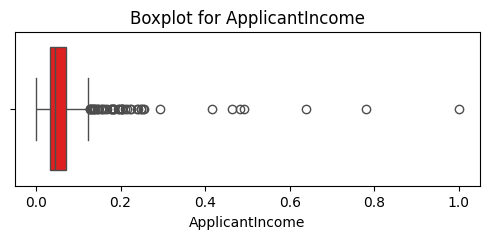

Removed 50 outliers from column: ApplicantIncome

📊 Column: CoapplicantIncome
Lower bound: -0.08 | Upper bound: 0.14
Outliers detected: 16
     CoapplicantIncome
12                0.19
38                0.17
122               0.22
135               0.19
177               0.27
180               0.17
253               0.17
349               0.15
372               0.19
402               0.48
417               0.48
444               0.20
513               0.16
523               0.17
581               0.81
600               1.00


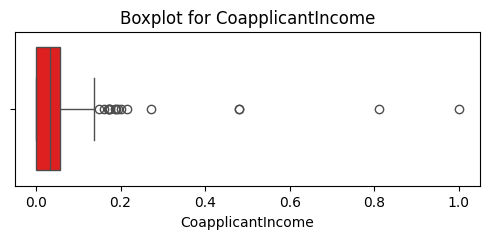

Removed 16 outliers from column: CoapplicantIncome

📊 Column: LoanAmount
Lower bound: 0.01 | Upper bound: 0.33
Outliers detected: 28
     LoanAmount
5          0.37
14         0.01
21         0.44
65         0.36
83         0.37
152        0.34
159        0.36
161        0.38
212        0.33
233        0.39
236        0.36
255        0.36
260        0.46
325        0.53
348        0.36
351        0.43
381        0.42
391        0.38
484        0.34
505        0.34
511        0.35
514        0.44
536        0.46
557        0.36
564        0.36
568        0.00
592        0.41
611        0.35


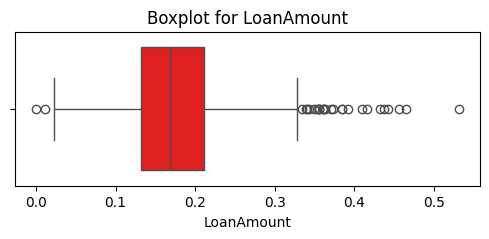

Removed 28 outliers from column: LoanAmount

DataFrame shape after outlier removal: (520, 13)


In [23]:
skip_cols = ['Loan_Amount_Term']

print("\n=== OUTLIER DETECTION AND REMOVAL RESULTS ===")
initial_shape = Data_set.shape
print("DataFrame shape before outlier removal:", initial_shape)

for col in number_cols:
    if col in skip_cols:
        continue
    if Data_set[col].nunique() > 5:  # only analyze columns with variation
        outliers, lower, upper = detect_outliers_iqr(Data_set, col)
        print(f"\n📊 Column: {col}")
        print(f"Lower bound: {lower:.2f} | Upper bound: {upper:.2f}")
        print(f"Outliers detected: {len(outliers)}")

    # Optional: show outlier rows (uncomment if you want to see details)
        print(outliers[[col]])

    # Visualization
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=Data_set[col], color='red')
        plt.title(f"Boxplot for {col}")
        plt.show()

        # Remove outliers
        outliers_to_remove = Data_set[(Data_set[col] < lower) | (Data_set[col] > upper)]
        Data_set = Data_set.drop(outliers_to_remove.index).copy()
        print(f"Removed {len(outliers_to_remove)} outliers from column: {col}")


print("\nDataFrame shape after outlier removal:", Data_set.shape)

In [24]:


cat_cols = Data_set.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns before encoding:", cat_cols)

if 'Dependents' in Data_set.columns:
    Data_set['Dependents'] = Data_set['Dependents'].replace('3+', 3)
    Data_set['Dependents'] = pd.to_numeric(Data_set['Dependents'], errors='coerce')

binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status','Credit_History']

le = LabelEncoder()
for col in binary_cols:
    if col in Data_set.columns:
        Data_set[col] = le.fit_transform(Data_set[col])

multi_cols = ['Property_Area']
Data_set = pd.get_dummies(Data_set, columns=multi_cols, drop_first=True)

print("\nEncoding complete!")
print(Data_set.head())
print("\nData types after encoding:")
print(Data_set.dtypes)


Categorical columns before encoding: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

Encoding complete!
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             0.07               0.00        0.20              0.74   
1             0.05               0.04        0.17              0.74   
2             0.04               0.00        0.08              0.74   
3             0.03               0.06        0.16              0.74   
4             0.07               0.00   

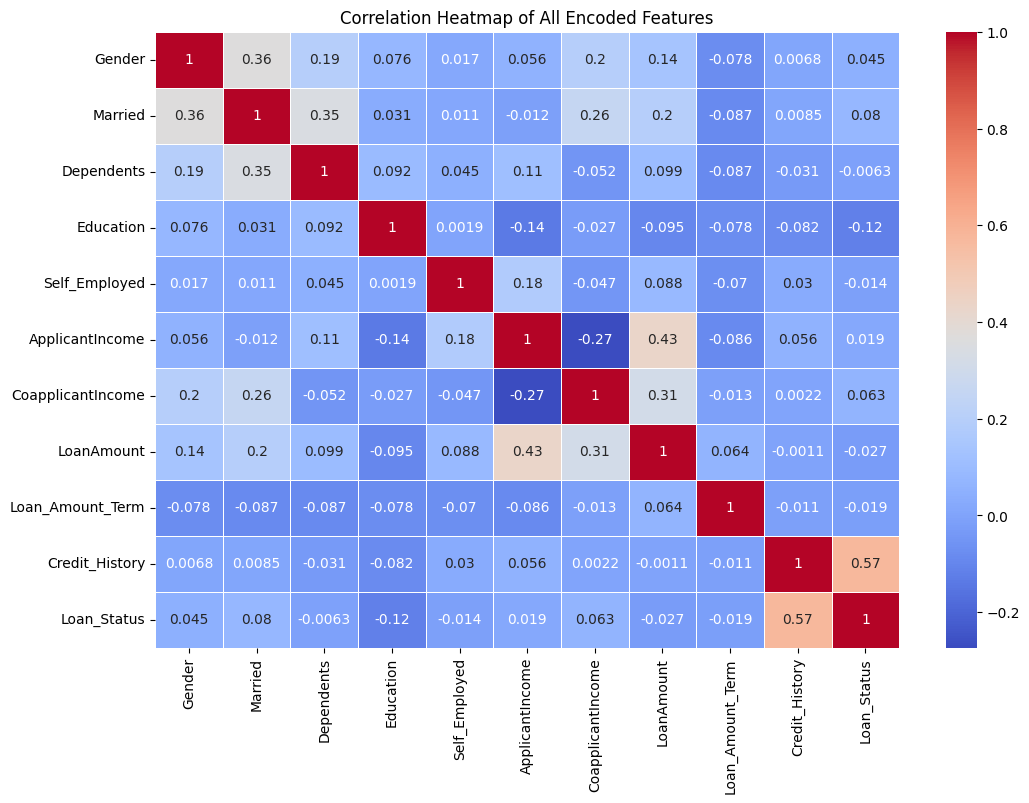

Correlation of features with Loan_Status:
Loan_Status          1.000000
Credit_History       0.572195
Married              0.079509
CoapplicantIncome    0.062758
Gender               0.045152
ApplicantIncome      0.019391
Dependents          -0.006297
Self_Employed       -0.014147
Loan_Amount_Term    -0.018989
LoanAmount          -0.027239
Education           -0.117472
Name: Loan_Status, dtype: float64


In [25]:
corr_matrix = Data_set.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Encoded Features")
plt.show()

target_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)
print("Correlation of features with Loan_Status:")
pd.set_option('display.float_format', '{:.6f}'.format) # Set display format to show more decimal places
print(target_corr)
pd.reset_option('display.float_format') # Reset display format to default

# Task
Analyze the provided dataset to identify skewness in numerical features, handle missing values, detect outliers using the IQR method, encode categorical variables, and perform a correlation analysis with the target variable, ensuring that the correlation values are displayed with full precision in both the heatmap and the printed output.

**Reasoning**:
Merge the imputed numeric and categorical dataframes and display the head and data types to verify the merge.



In [26]:
Data_set = pd.merge(df, dc, left_index=True, right_index=True)
print(Data_set.head())
print("\nData types after merging:")
print(Data_set.dtypes)

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed